## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
# crop recommendation dataset
crp = pd.read_csv("C:/Users/rcavi/Desktop/Crop_recommendation.csv")

In [32]:
crp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [33]:
crp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [35]:
crp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [44]:
crp.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot:>

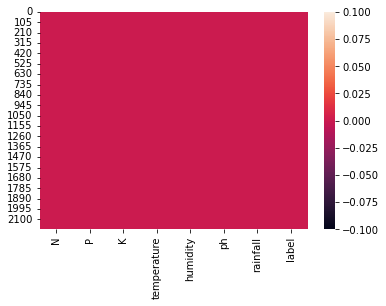

In [36]:
sns.heatmap(crp.isnull())

<AxesSubplot:>

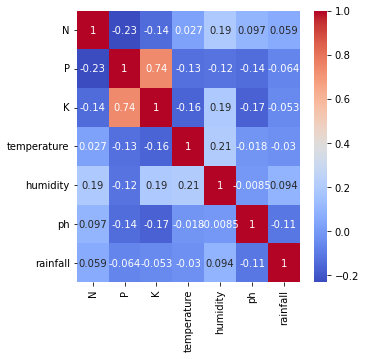

In [38]:
corr=crp.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [3]:
crp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Uploading the datasets

In [4]:
    crp = pd.read_csv("C:/Users/rcavi/Desktop/Crop_recommendation.csv")

## START : temp and precipitation datasets of the cities from 1990-2022 

In [6]:
   #Bangalore_1990_2022_BangaloreCity
    
bg = pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv")

In [7]:
bg



,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [8]:
#Chennai_1990_2022_Madras

ch = pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv")

In [9]:
ch

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11889,21-07-2022,28.4,24.5,32.8,21.1
11890,22-07-2022,27.8,24.6,32.2,22.1
11891,23-07-2022,27.4,24.7,32.6,18.6
11892,24-07-2022,27.8,25.0,33.3,9.1


In [10]:
#Delhi_NCR_1990_2022_Safdarjung

dl = pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv")

In [16]:
dl

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0
...,...,...,...,...,...
11889,21-07-2022,28.6,26.8,30.6,21.2
11890,22-07-2022,29.3,27.0,32.9,0.3
11891,23-07-2022,30.1,25.5,34.9,8.9
11892,24-07-2022,30.6,27.1,35.7,0.0


In [11]:
#Lucknow_1990_2022

lk=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv")

In [12]:
lk

,time,tavg,tmin,tmax,prcp
0,01-01-1990,7.2,NaN,18.1,0.0
1,02-01-1990,10.5,NaN,17.2,0.0
2,03-01-1990,10.2,1.8,18.6,NaN
3,04-01-1990,9.1,NaN,19.3,0.0
4,05-01-1990,13.5,NaN,23.8,0.0
...,...,...,...,...,...
11889,21-07-2022,27.4,25.1,33.1,27.3
11890,22-07-2022,28.1,26.1,31.1,16.0
11891,23-07-2022,30.3,26.2,34.7,11.9
11892,24-07-2022,30.0,28.1,34.7,2.0


In [13]:
#Mumbai_1990_2022_Santacruz

mi=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv")

In [14]:
mi

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0
...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9
11890,22-07-2022,28.3,26.0,30.5,3.0
11891,23-07-2022,28.2,25.8,31.3,5.1
11892,24-07-2022,28.1,25.6,30.4,7.1


In [15]:
#Rajasthan_1990_2022_Jodhpur

jd=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv")

In [16]:
jd

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [17]:
#weather_Bhubhneshwar_1990_2022

bb=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/weather_Bhubhneshwar_1990_2022.csv")

In [18]:
bb

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN
11931,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN
11932,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN
11933,2022-09-03,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN


In [19]:
#weather_Rourkela_2021_2022

rk=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/weather_Rourkela_2021_2022.csv")

In [20]:
rk

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-07-06,29.3,26.2,32.6,NaN,NaN,197.0,6.8,NaN,1002.5,NaN
1,2021-07-07,29.7,27.3,33.4,11.1,NaN,199.0,6.9,NaN,1002.2,NaN
2,2021-07-08,27.4,25.8,29.7,66.9,NaN,186.0,6.3,NaN,1001.8,NaN
3,2021-07-09,28.5,26.1,32.1,11.4,NaN,173.0,3.9,NaN,1001.0,NaN
4,2021-07-10,29.0,26.2,32.6,2.7,NaN,121.0,4.6,NaN,1000.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,NaN,187.0,8.6,NaN,1006.8,NaN
422,2022-09-01,29.1,25.7,33.2,11.5,NaN,205.0,6.7,NaN,1007.2,NaN
423,2022-09-02,29.4,26.4,33.7,1.5,NaN,189.0,7.0,NaN,1007.5,NaN
424,2022-09-03,28.7,26.6,32.6,8.0,NaN,203.0,8.0,NaN,1005.8,NaN


In [21]:
#Longitute_Latitude_Elevation_of_all_the_above_loco

#Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326

lat_long=pd.read_csv("C:/Users/rcavi/Desktop/Temperature_And_Precipitation_Cities_IN/Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv")

In [22]:
lat_long

,longitude,Latitude,Elevation,Location_Name
0,73.0167,26.3000,217.0,Bangalore
1,80.2500,13.0667,6.0,Chennai
2,77.2000,28.5833,211.0,Delhi
3,80.9330,26.8667,110.0,Lucknow
4,72.8500,19.1167,8.0,Mumbai
5,77.5833,12.9667,920.0,Rajastan
6,85.8333,20.2500,NaN,Bubhneshwar
7,84.8833,22.2167,NaN,Rourkela


## END

In [23]:
#price,variety,types of crops

csv=pd.read_csv("C:/Users/rcavi/Desktop/csv")

In [45]:
csv

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500


In [47]:
csv.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [51]:
csv.shape

(2238, 9)

In [25]:
#district wise rainfall

drf = pd.read_csv("C:/Users/rcavi/Desktop/district wise rainfall normal.csv")

In [26]:
drf

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [29]:
# rainfall in india 1901-2015

#Sub-division wise monthly data for 115 years from 1901-2015.

rf = pd.read_csv("C:/Users/rcavi/Desktop/rainfall in india 1901-2015.csv")

In [30]:
rf

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
